<b>This initial pre-processing and model has been taken from the work of:</b> <br/>Khera, A. 2019. Urban Sound Classification [Source code]. Available at: https://github.com/AmritK10/Urban-Sound-Classification [Accessed: 02 March 2020].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import librosa

# This part only has to run once

In [80]:

#forming a panda dataframe from the metadata file
# data=pd.read_csv("UrbanSound8K.csv")
# classes = pd.DataFrame(data[['classID', 'class']].groupby(['classID', 'class']).count())

# Write the classes to a csv file
# Writing the data into csn form to use in d3.js

# classes.to_csv(r'classes.csv')

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [2]:
# reading the csv file with the metadata
# data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [7]:
#preprocessing using only mfcc
# x_train=[]
# x_test=[]
# y_train=[]
# y_test=[]
# path="UrbanSound8K/audio/fold"
# for i in tqdm(range(len(data))):
#     fold_no=str(data.iloc[i]["fold"])
#     file=data.iloc[i]["slice_file_name"]
#     label=data.iloc[i]["classID"]
#     filename=path+fold_no+"/"+file
#     print(filename)
#     y,sr=librosa.load(filename)
#     mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
#     print(mfccs.shape,mfccs.max(),mfccs.min())
#     if(fold_no!='10'):
#       x_train.append(mfccs)
#       y_train.append(label)
#     else:
#       x_test.append(mfccs)
#       y_test.append(label)

In [4]:
#preprocessing using entire feature set
# x_train=[]
# x_test=[]
# y_train=[]
# y_test=[]
# path="UrbanSound8K/audio/fold"
# for i in tqdm(range(len(data))):
#     fold_no=str(data.iloc[i]["fold"])
#     file=data.iloc[i]["slice_file_name"]
#     label=data.iloc[i]["classID"]
#     filename=path+fold_no+"/"+file
#     y,sr=librosa.load(filename)
#     mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
#     melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
#     chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
#     chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
#     features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
#     if(fold_no!='10'):
#       x_train.append(features)
#       y_train.append(label)
#     else:
#       x_test.append(features)
#       y_test.append(label)

In [ ]:
# converting the lists into numpy arrays
# x_train=np.array(x_train)
# x_test=np.array(x_test)
# y_train=np.array(y_train)
# y_test=np.array(y_test)

# # shape
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
# #reshaping into 2d to save in csv format
# x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
# x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
# x_train_2d.shape,x_test_2d.shape

# #saving the data numpy arrays
# np.savetxt("train_data.csv", x_train_2d, delimiter=",")
# np.savetxt("test_data.csv",x_test_2d,delimiter=",")
# np.savetxt("train_labels.csv",y_train,delimiter=",")
# np.savetxt("test_labels.csv",y_test,delimiter=",")

# Unitl this point no need to run more than once, the rest is the model

In [27]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')
y_test_a = genfromtxt('test_labels.csv', delimiter=',')

In [18]:
#converting to one hot encoder
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [28]:
#reshaping to 1D 
x_train=np.reshape(x_train,(x_train.shape[0], 200, 1))
x_test=np.reshape(x_test,(x_test.shape[0], 200, 1))
x_train.shape,x_test.shape

((7895, 200, 1), (837, 200, 1))

In [29]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

((7895, 40, 5), (837, 40, 5))

In [19]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))
x_train.shape,x_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1))

In [20]:
#shapes
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((7895, 40, 5, 1), (837, 40, 5, 1), (7895, 10), (837, 10))

In [11]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.callbacks import EarlyStopping

In [21]:
# Model from GitHub

#adding layers and forming the model

#forming model
model=Sequential()

model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#training the model
model_history = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 11s 1ms/step - loss: 1.9706 - acc: 0.3111 - val_loss: 1.5121 - val_acc: 0.4695
Epoch 2/30
7895/7895 [==============================] - 9s 1ms/step - loss: 1.3246 - acc: 0.5476 - val_loss: 1.1910 - val_acc: 0.6380
Epoch 3/30
7895/7895 [==============================] - 9s 1ms/step - loss: 1.0466 - acc: 0.6443 - val_loss: 1.1218 - val_acc: 0.6392
Epoch 4/30
7895/7895 [==============================] - 9s 1ms/step - loss: 0.8803 - acc: 0.7037 - val_loss: 1.0632 - val_acc: 0.6511
Epoch 5/30
7895/7895 [==============================] - 9s 1ms/step - loss: 0.7539 - acc: 0.7426 - val_loss: 1.1265 - val_acc: 0.6523
Epoch 6/30
7895/7895 [==============================] - 9s 1ms/step - loss: 0.6945 - acc: 0.7702 - val_loss: 0.9793 - val_acc: 0.6930
Epoch 7/30
7895/7895 [==============================] - 9s 1ms/step - loss: 0.6445 - acc: 0.7895 - val_loss: 0.9872 - val_acc: 0.7061
Epoch 8/30
789

In [50]:
#forming model with early stopping
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
model = Sequential()
model.add(Flatten(input_shape=[40, 5]))
model.add(Dense(300, activation="relu"))   
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_Early_Stop_history = model.fit(x_train, y_train, epochs = 60, validation_split=0.1, callbacks=[early_stopping_cb])
model.evaluate(x_test, y_test)

Train on 7105 samples, validate on 790 samples
Epoch 1/60
7105/7105 [==============================] - 2s 273us/step - loss: 8.5239 - acc: 0.1863 - val_loss: 3.7180 - val_acc: 0.1671
Epoch 2/60
7105/7105 [==============================] - 1s 111us/step - loss: 1.7833 - acc: 0.3892 - val_loss: 5.7342 - val_acc: 0.1468
Epoch 3/60
7105/7105 [==============================] - 1s 111us/step - loss: 1.5157 - acc: 0.4930 - val_loss: 3.2043 - val_acc: 0.2456
Epoch 4/60
7105/7105 [==============================] - 1s 111us/step - loss: 1.2926 - acc: 0.5495 - val_loss: 6.9493 - val_acc: 0.2051
Epoch 5/60
7105/7105 [==============================] - 1s 111us/step - loss: 1.3581 - acc: 0.5552 - val_loss: 2.6886 - val_acc: 0.3266
Epoch 6/60
7105/7105 [==============================] - 1s 112us/step - loss: 1.1341 - acc: 0.6115 - val_loss: 3.9128 - val_acc: 0.2785
Epoch 7/60
7105/7105 [==============================] - 1s 113us/step - loss: 1.0652 - acc: 0.6418 - val_loss: 2.2325 - val_acc: 0.4038
E

[1.490253917240897, 0.5304659498207885]

In [31]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

837/837 [==============================] - 0s 42us/step
[0.9345611502775926, 0.6822039265244576]
[1.4766675176871151, 0.5053763441216276]


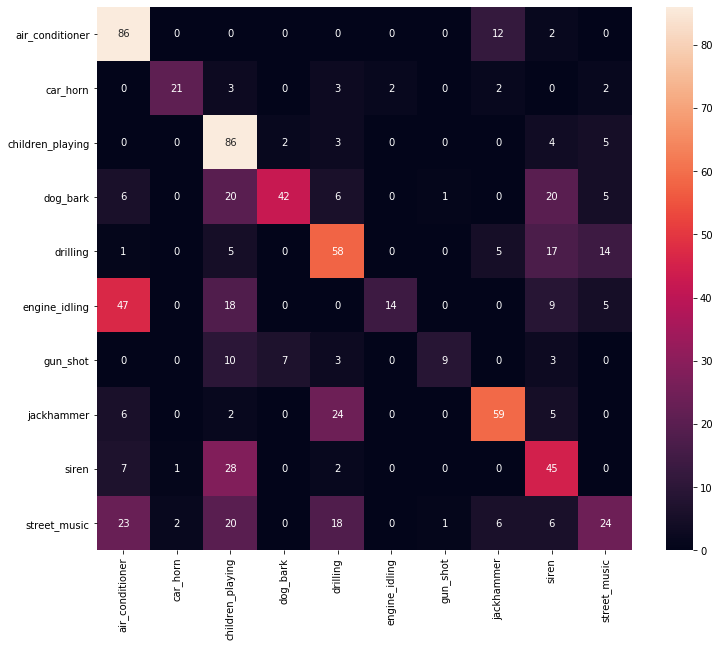

In [91]:
y_test_pred = model.predict_classes(x_test)

classes = pd.read_csv("classes.csv")
classes = classes['class'].tolist()

axis_labels = classes # labels for x-axis

# create seabvorn heatmap with required labels


import sklearn
array = sklearn.metrics.confusion_matrix(y_test_a, y_test_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
sn.heatmap(array, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
# fixing axis that are cut otherwise
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [35]:
# Try with ReLU activation for hidden layers
model = Sequential()
model.add(Flatten(input_shape=[40, 5]))
model.add(Dense(300, activation="relu"))   
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
ReLU_history = model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))
model.evaluate(x_test, y_test)

Train on 7895 samples, validate on 837 samples
Epoch 1/30
7895/7895 [==============================] - 1s 188us/step - loss: 7.0121 - acc: 0.2267 - val_loss: 2.1269 - val_acc: 0.3274
Epoch 2/30
7895/7895 [==============================] - 1s 76us/step - loss: 1.6388 - acc: 0.4438 - val_loss: 1.7643 - val_acc: 0.4122
Epoch 3/30
7895/7895 [==============================] - 1s 74us/step - loss: 1.4359 - acc: 0.5093 - val_loss: 1.6219 - val_acc: 0.4492
Epoch 4/30
7895/7895 [==============================] - 1s 74us/step - loss: 1.2848 - acc: 0.5601 - val_loss: 1.6251 - val_acc: 0.5185
Epoch 5/30
7895/7895 [==============================] - 1s 74us/step - loss: 1.1887 - acc: 0.5900 - val_loss: 1.5995 - val_acc: 0.4934
Epoch 6/30
7895/7895 [==============================] - 1s 74us/step - loss: 1.1280 - acc: 0.6152 - val_loss: 1.5213 - val_acc: 0.4755
Epoch 7/30
7895/7895 [==============================] - 1s 74us/step - loss: 1.0763 - acc: 0.6299 - val_loss: 1.4903 - val_acc: 0.5663
Epoch 8

[1.774682123601223, 0.5400238948626045]

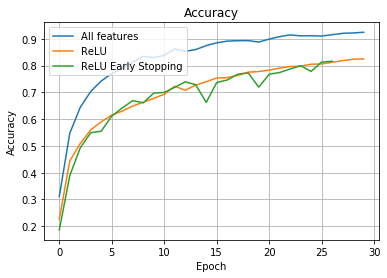

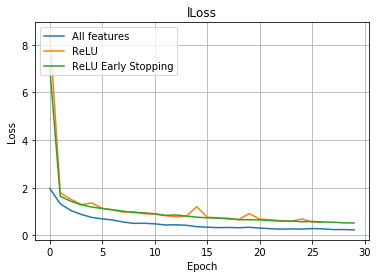

In [51]:
# Visualise loss/accuracy during training
import matplotlib.pyplot as plt

plt.plot(model_history.history['acc'])
plt.plot(ReLU_history.history['acc'])
plt.plot(ReLU_Early_Stop_history.history['acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['All features', 'ReLU', 'ReLU Early Stopping'], loc='upper left')
plt.grid()
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(ReLU_Early_Stop_history.history['loss'])
plt.plot(ReLU_history.history['loss'])
plt.title('lLoss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['All features', 'ReLU', 'ReLU Early Stopping'], loc='upper left')
plt.grid()
plt.show()


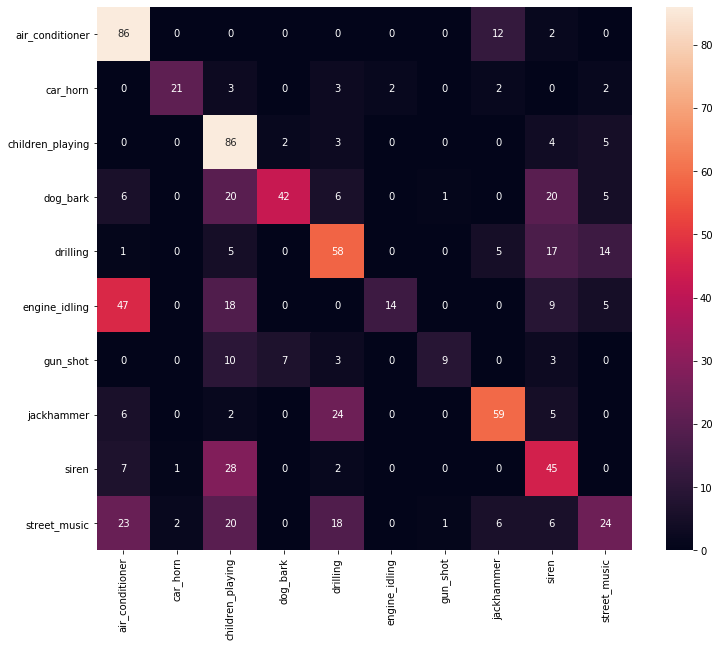

In [92]:
y_test_pred = model.predict_classes(x_test)

classes = pd.read_csv("classes.csv")
classes = classes['class'].tolist()

axis_labels = classes # labels for x-axis

# create seabvorn heatmap with required labels


import sklearn
array = sklearn.metrics.confusion_matrix(y_test_a, y_test_pred)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
sn.heatmap(array, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
# fixing axis that are cut otherwise
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [121]:
# 10 fold cross-validation
# Until we have the 10 folds with the features available, we will use random folds

import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

# Cross-Validate
kf = KFold(10, shuffle=True, random_state=42) # Use for KFold classification
    
accuracy_scores = []

x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# x_val = 1 of the folds
# x_test = next fold

fold = 0
for train, test in kf.split(x):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    model.add(Flatten(input_shape=[40, 5]))
    model.add(Dense(300, activation="relu"))   
    model.add(Dense(100, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = ["accuracy"])
    model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test), verbose=0)
    model_evaluation = model.evaluate(x_test, y_test, verbose = 0)
    score = model_evaluation[1]
    accuracy_scores.append(score)
    print("Fold score (Accuracy): {score}".format(score = score))

# Build the oos prediction list and calculate the error.
final_score = np.mean(accuracy_scores)
print(f"Final, out of sample score (Accuracy): {final_score}")    
    
# Write the cross-validated prediction
# oos_y = pd.DataFrame(oos_y)
# oos_pred = pd.DataFrame(oos_pred)
# oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)

Fold #1
874/874 [==============================] - 0s 54us/step
Fold score (Accuracy): 0.7734553778471609
Fold #2
874/874 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.7105263160622638
Fold #3
873/873 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.690721649689363
Fold #4
873/873 [==============================] - 0s 56us/step
Fold score (Accuracy): 0.6723940437328911
Fold #5
873/873 [==============================] - 0s 57us/step
Fold score (Accuracy): 0.558991981877221
Fold #6
873/873 [==============================] - 0s 58us/step
Fold score (Accuracy): 0.6712485684288872
Fold #7
873/873 [==============================] - 0s 64us/step
Fold score (Accuracy): 0.6781214205942886
Fold #8
873/873 [==============================] - 0s 59us/step
Fold score (Accuracy): 0.6403207333773409
Fold #9
873/873 [==============================] - 0s 59us/step
Fold score (Accuracy): 0.7445589921182237
Fold #10
873/873 [==============================